In [ ]:
from feast import FeatureStore
import os

repo_path = os.path.join(os.path.dirname(""), "aqi_feature_store", "feature_repo")
fs = FeatureStore(repo_path=repo_path)
print("✅ Feature store loaded successfully")
print("Entities:", fs.list_entities())
print("Feature views:", fs.list_feature_views())




✅ Feature store loaded successfully
Entities: [Entity(
    name='sensor_id',
    value_type=<ValueType.STRING: 2>,
    join_key='sensor_id',
    description='Unique identifier for AQI sensor record',
    tags={},
    owner='',
    created_timestamp=datetime.datetime(2025, 10, 17, 18, 28, 44, 705255),
    last_updated_timestamp=datetime.datetime(2025, 10, 17, 18, 28, 44, 705255)
)]
Feature views: [<FeatureView(name = karachi_air_features, entities = ['sensor_id'], ttl = 7 days, 0:00:00, stream_source = None, data_source = {
  "type": "BATCH_FILE",
  "timestampField": "time",
  "fileOptions": {
    "uri": "C:\\Users\\HP\\Desktop\\AQI predictor\\aqi_feature_store\\feature_repo\\data\\processed_unscaled.parquet"
  },
  "name": "C:\\Users\\HP\\Desktop\\AQI predictor\\aqi_feature_store\\feature_repo\\data\\processed_unscaled.parquet",
  "meta": {
    "createdTimestamp": "2025-10-17T18:28:44.533596Z",
    "lastUpdatedTimestamp": "2025-10-17T18:28:44.704321Z"
  }
}, source_views = [], batch_so

In [2]:
import pandas as pd

entity_df = pd.DataFrame({
    "sensor_id": ["SENSOR_1"],  # or list of all sensor IDs
    "event_timestamp": pd.to_datetime(["2025-10-16 19:00:00"])  # must include timestamp
})

feature_table_name = "karachi_air_features"

features_list = [
    f"{feature_table_name}:pm10",
    f"{feature_table_name}:pm2_5",
    f"{feature_table_name}:carbon_monoxide",
    f"{feature_table_name}:nitrogen_dioxide",
    f"{feature_table_name}:sulphur_dioxide",
    f"{feature_table_name}:ozone",
    f"{feature_table_name}:temperature_2m",
    f"{feature_table_name}:aqi"
]

training_data = fs.get_historical_features(
    entity_df=entity_df,
    features=features_list
).to_df()

print("✅ Historical features pulled successfully")
print(training_data.head())


✅ Historical features pulled successfully
  sensor_id           event_timestamp  pm10  pm2_5  carbon_monoxide  \
0  SENSOR_1 2025-10-16 19:00:00+00:00   NaN    NaN              NaN   

   nitrogen_dioxide  sulphur_dioxide  ozone  temperature_2m  aqi  
0               NaN              NaN    NaN             NaN  NaN  


In [3]:
# -----------------------------
# STEP 2: Pull historical features correctly
# -----------------------------
from feast import FeatureStore
import pandas as pd

# 1️⃣ Load your Feature Store
fs = FeatureStore(repo_path=r"C:\Users\HP\Desktop\AQI predictor\aqi_feature_store\feature_repo")
print("✅ Feature store loaded successfully")

# List entities and feature views
print("Entities:", fs.list_entities())
print("Feature views:", fs.list_feature_views())

# 2️⃣ Inspect your parquet source to confirm sensor IDs and timestamps
parquet_path = r"C:\Users\HP\Desktop\AQI predictor\aqi_feature_store\feature_repo\data\processed_unscaled.parquet"
df_source = pd.read_parquet(parquet_path)
print("✅ Parquet source loaded successfully")
print("Sensor IDs in data:", df_source['sensor_id'].unique())
print("Timestamp range:", df_source['time'].min(), "to", df_source['time'].max())

# 3️⃣ Prepare entity dataframe for Feast
# Use all sensor_ids and their timestamps
entity_df = df_source[['sensor_id', 'time']].rename(columns={'time': 'event_timestamp'})

# 4️⃣ Specify the features you want from FeatureView
feature_table_name = "karachi_air_features"  # Your FeatureView name
features_list = [
    f"{feature_table_name}:pm10",
    f"{feature_table_name}:pm2_5",
    f"{feature_table_name}:carbon_monoxide",
    f"{feature_table_name}:nitrogen_dioxide",
    f"{feature_table_name}:sulphur_dioxide",
    f"{feature_table_name}:ozone",
    f"{feature_table_name}:temperature_2m",
    f"{feature_table_name}:relative_humidity_2m",
    f"{feature_table_name}:dew_point_2m",
    f"{feature_table_name}:apparent_temperature",
    f"{feature_table_name}:pressure_msl",
    f"{feature_table_name}:windspeed_10m",
    f"{feature_table_name}:winddirection_10m",
    f"{feature_table_name}:aqi",
    f"{feature_table_name}:aqi_change",
    f"{feature_table_name}:aqi_pct_change"
]

# 5️⃣ Pull historical features
training_data = fs.get_historical_features(
    entity_df=entity_df,
    features=features_list
).to_df()

# 6️⃣ Inspect pulled data
print("✅ Historical features pulled successfully")
print(training_data.head())
print("Total rows:", len(training_data))


✅ Feature store loaded successfully
Entities: [Entity(
    name='sensor_id',
    value_type=<ValueType.STRING: 2>,
    join_key='sensor_id',
    description='Unique identifier for AQI sensor record',
    tags={},
    owner='',
    created_timestamp=datetime.datetime(2025, 10, 17, 18, 28, 44, 705255),
    last_updated_timestamp=datetime.datetime(2025, 10, 17, 18, 28, 44, 705255)
)]
Feature views: [<FeatureView(name = karachi_air_features, entities = ['sensor_id'], ttl = 7 days, 0:00:00, stream_source = None, data_source = {
  "type": "BATCH_FILE",
  "timestampField": "time",
  "fileOptions": {
    "uri": "C:\\Users\\HP\\Desktop\\AQI predictor\\aqi_feature_store\\feature_repo\\data\\processed_unscaled.parquet"
  },
  "name": "C:\\Users\\HP\\Desktop\\AQI predictor\\aqi_feature_store\\feature_repo\\data\\processed_unscaled.parquet",
  "meta": {
    "createdTimestamp": "2025-10-17T18:28:44.533596Z",
    "lastUpdatedTimestamp": "2025-10-17T18:28:44.704321Z"
  }
}, source_views = [], batch_so

✅ Random Forest trained successfully
✅ Model saved at: C:\Users\HP\Desktop\AQI predictor\aqi_feature_store\rf_aqi_model.pkl
Mean Squared Error (MSE): 5.02
Root Mean Squared Error (RMSE): 2.24
Mean Absolute Error (MAE): 0.52
R^2 Score: 0.99


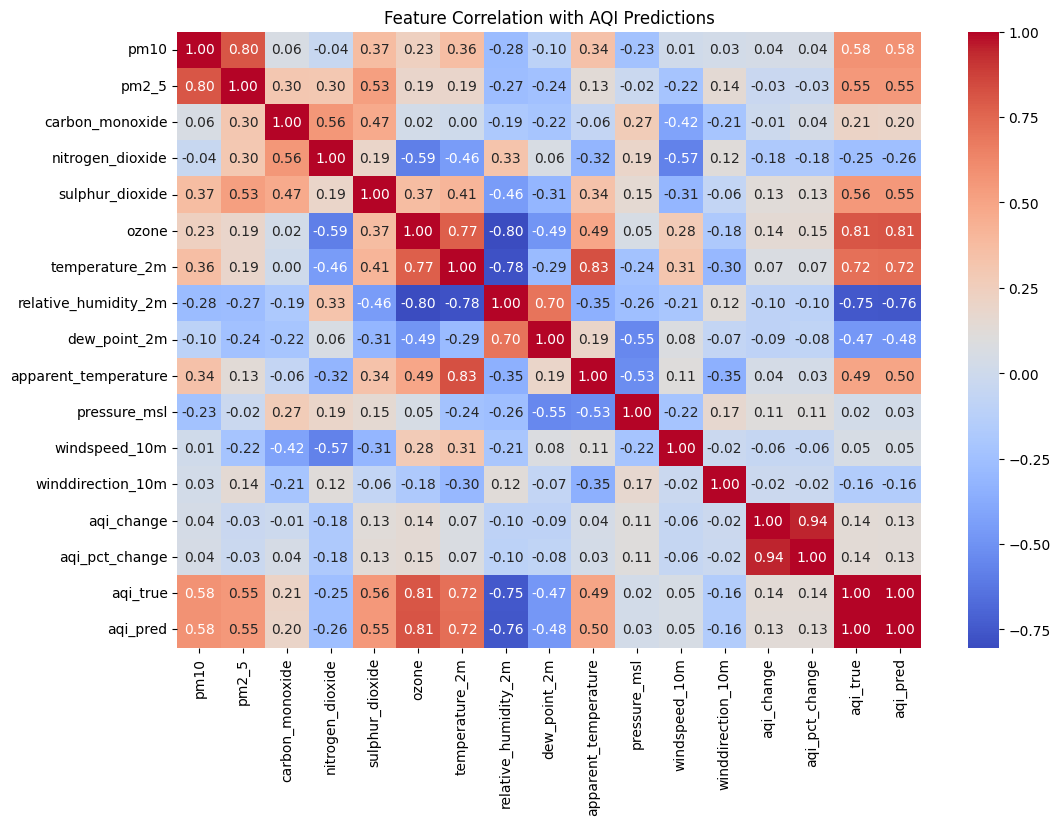

In [10]:
# -----------------------------
# Step 3: Train Random Forest and Evaluate
# -----------------------------
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load the historical features pulled in Step 2
data = training_data.copy()

# Drop columns not used as features
X = data.drop(columns=["sensor_id", "event_timestamp", "aqi"])
y = data["aqi"]

# -----------------------------
# Split into train and test sets
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------
# Train Random Forest
# -----------------------------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("✅ Random Forest trained successfully")

# -----------------------------
# Save the model
# -----------------------------
model_path = r"C:\Users\HP\Desktop\AQI predictor\aqi_feature_store\rf_aqi_model.pkl"
joblib.dump(rf_model, model_path)
print(f"✅ Model saved at: {model_path}")

# -----------------------------
# Make predictions on test set
# -----------------------------
y_pred = rf_model.predict(X_test)

# -----------------------------
# Evaluation metrics
# -----------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5  # sqrt(MSE)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R^2 Score: {r2:.2f}")

# -----------------------------
# Correlation heatmap of features + predictions
# -----------------------------
# Add predictions to test dataframe
test_df = X_test.copy()
test_df["aqi_true"] = y_test
test_df["aqi_pred"] = y_pred

plt.figure(figsize=(12, 8))
sns.heatmap(test_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation with AQI Predictions")
plt.show()


✅ Random Forest model loaded successfully
Mean Squared Error (MSE): 1.85
Root Mean Squared Error (RMSE): 1.36
Mean Absolute Error (MAE): 0.29
R^2 Score: 1.00


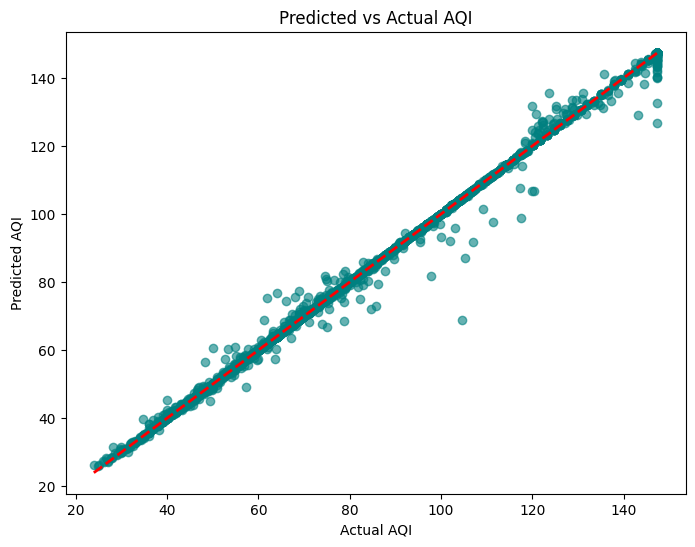

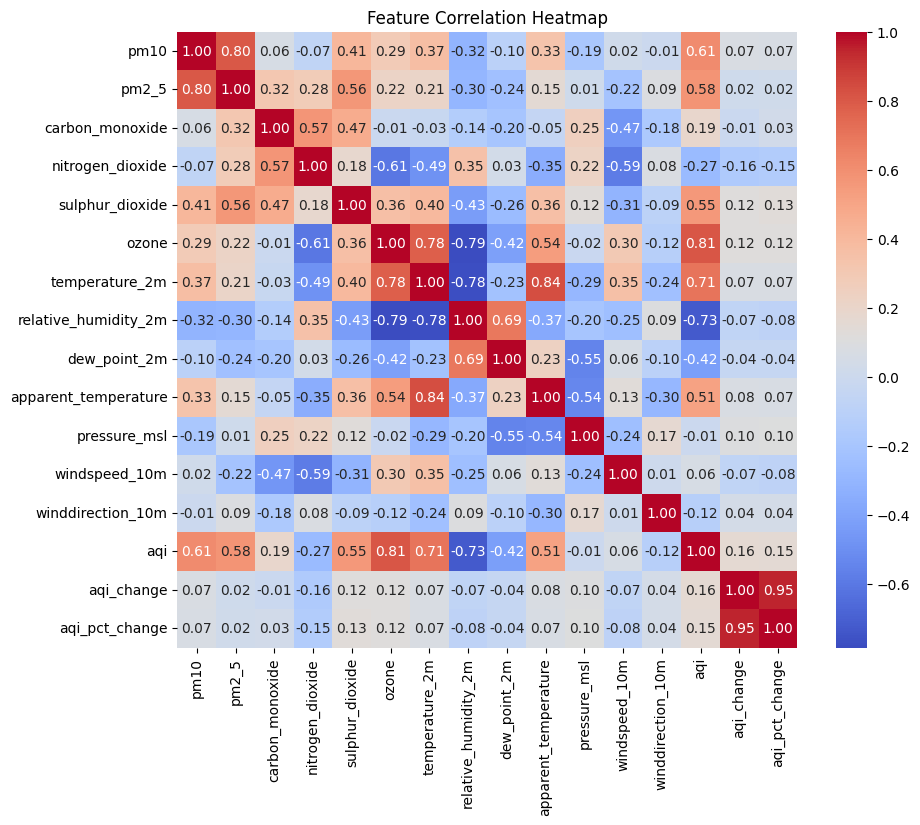

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Load model and test data
# -----------------------------
model_path = r"C:\Users\HP\Desktop\AQI predictor\aqi_feature_store\rf_aqi_model.pkl"
rf_model = joblib.load(model_path)
print("✅ Random Forest model loaded successfully")

# Assuming 'training_data' is your full historical features pulled from Feast
# Split into features and target for evaluation
test_data = training_data.copy()
X_test = test_data.drop(columns=["sensor_id", "event_timestamp", "aqi"])
y_test = test_data["aqi"]

# -----------------------------
# Make predictions
# -----------------------------
y_pred = rf_model.predict(X_test)

# -----------------------------
# Compute metrics
# -----------------------------
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



